<a href="https://colab.research.google.com/github/mevangelista-alvarado/neural_networks/blob/main/RedNeuronalConvolucional_Ejemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

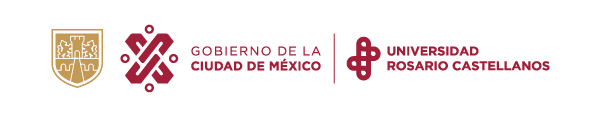

## Introducción

Mostramos un ejemplo simple de una red neuronal convolucional en `Python` (con `Numpy`), en el dataset de MNIST (con `sklearn`)

## Implementación en Python

Importamos los módulos necesarios

In [6]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

Importamos las bibliotecas necesarias: `NumPy` para operaciones numéricas y `load_digits` de `scikit-learn` para obtener el conjunto de datos de _MNIST_.

In [7]:
# Cargar el conjunto de datos load_digits
digits = load_digits()
data, labels = digits.data, digits.target

Cargamos el conjunto de datos load_digits, que contiene imágenes de dígitos escritos a mano y sus etiquetas asociadas. data son las imágenes y labels son las etiquetas correspondientes.

In [ ]:
# Dividir el conjunto de datos en entrenamiento y prueba
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=42)

Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba usando `train_test_split` de `scikit-learn`. El $80%$ se utiliza para entrenamiento y el $20%$ para pruebas.



In [ ]:
# Definir funciones de activación
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

Definimos dos funciones de activación: `sigmoid` y `sigmoid_derivative`.

La función `sigmoid` realiza la operación de la función de activación sigmoide, y `sigmoid_derivative` calcula la derivada de la función sigmoide.

In [ ]:
# Inicialización de pesos
input_channels = 1
num_filters = 8
filter_size = 3
# 10 unidades de salida para las etiquetas (número de dígitos)
hidden_units = 10
learning_rate = 0.01

Estas variables definen algunos de los hiperparámetros y características clave de la red neuronal convolucional (CNN) en este código.

* __input_channels__: Este valor representa el número de canales en la imagen de entrada. En este caso, se está trabajando con imágenes en escala de grises, por lo que hay un solo canal.

    Si las imágenes fueran a color (por ejemplo, en formato RGB), este valor sería 3, ya que habría tres canales (rojo, verde, azul).

* __num_filters__ = 8: Este es el número de filtros o kernels que se utilizarán en la capa convolucional. Cada filtro es una matriz de pesos que se convoluciona con la imagen de entrada para extraer características específicas.

* __filter_size__ = 3: Este valor indica el tamaño del filtro o kernel en la capa convolucional. En este caso, se usa un filtro cuadrado de 3x3.

    El tamaño del filtro determina la cantidad de información local que se considera al realizar la convolución.

* __hidden_units__ = 10: Este valor especifica el número de unidades en la capa completamente conectada.

    En este caso, hay 10 unidades porque estamos trabajando con el conjunto de datos MNIST, que tiene 10 clases (dígitos del 0 al 9).

* __learning_rate__ = 0.01: La tasa de aprendizaje es un hiperparámetro que controla el tamaño de los pasos que se toman durante la optimización mediante descenso de gradiente.


In [ ]:
conv_weights = np.random.randn(num_filters, input_channels, filter_size, filter_size) * 0.1
conv_bias = np.zeros(num_filters)
fc_weights = np.random.randn(num_filters * 6 * 6, hidden_units) * 0.1
fc_bias = np.zeros(hidden_units)

Inicializamos los pesos y sesgos para la capa convolucional y la capa completamente conectada.
* __conv_weights__ son los pesos de la capa convolucional,

* __conv_bias__ son los sesgos de la capa convolucional,

* __fc_weights__ son los pesos de la capa completamente conectada, y

* __fc_bias__ son los sesgos de la capa completamente conectada.

In [ ]:
# NO EJECUTAR
for epoch in range(10):
    for i in range(len(train_data)):
        image = train_data[i].reshape(8, 8)
        label = train_labels[i]


Iteramos sobre las épocas (ciclos de entrenamiento) y las muestras de entrenamiento. Cada imagen de entrenamiento se redimensiona a 8x8 y se obtiene la etiqueta correspondiente.

In [ ]:
 # NO EJECUTAR
        # Capa convolucional
        conv_output = np.zeros((num_filters, 6, 6))
        for f in range(num_filters):
            for h in range(6):
                for w in range(6):
                    conv_output[f, h, w] = np.sum(image[h:h+3, w:w+3] * conv_weights[f]) + conv_bias[f]


Se realiza la operación de la capa convolucional. Se recorre cada filtro, y para cada filtro, se realiza la convolución con la imagen de entrada y se suma el sesgo.

In [ ]:
# NO EJECUTAR
        # Función de activación ReLU
        conv_output[conv_output < 0] = 0


Se aplica la función de activación ReLU a la salida de la capa convolucional.

In [ ]:
# NO EJECUTAR
        # Capa completamente conectada
        fc_input = conv_output.reshape(-1)
        fc_output = np.dot(fc_input, fc_weights) + fc_bias
        fc_output = sigmoid(fc_output)


Se aplanan las salidas de la capa convolucional y se aplican a la capa completamente conectada. Luego, se aplica la función de activación sigmoide.

In [ ]:
# NO EJECUTAR
        # Cálculo de la pérdida
        loss = 0.5 * (fc_output - (label == np.arange(10)))**2


Se calcula la pérdida cuadrática. La etiqueta se compara con un array one-hot encoding de los dígitos (de 0 a 9).

In [ ]:
# NO EJECUTAR
        # Retropropagación
        grad_loss = fc_output - (label == np.arange(10))
        grad_fc = grad_loss * sigmoid_derivative(fc_output)
        grad_fc_weights = np.outer(fc_input, grad_fc)
        grad_fc_bias = grad_fc

        grad_conv_output = grad_fc.dot(fc_weights.T).reshape(conv_output.shape)
        grad_conv_output[conv_output <= 0] = 0


Se realiza la retropropagación para actualizar los pesos y sesgos. Se calculan los gradientes para la capa completamente conectada y se propagan hacia atrás a la capa convolucional.

In [ ]:
# NO EJECUTAR
        # Actualización de los pesos
        fc_weights -= learning_rate * grad_fc_weights
        fc_bias -= learning_rate * grad_fc_bias

        for f in range(num_filters):
            for h in range(6):
                for w in range(6):
                    grad_conv_weights = image[h:h+3, w:w+3] * grad_conv_output[f, h, w]
                    grad_conv_bias = grad_conv_output[f, h, w]
                    conv_weights[f] -= learning_rate * grad_conv_weights
                    conv_bias[f] -= learning_rate * grad_conv_bias


Se actualizan los pesos y sesgos utilizando el descenso de gradiente.

In [ ]:
# NO EJECUTAR
    print(f'Epoch {epoch + 1}/10, Loss: {np.sum(loss)}')

Se imprime la pérdida después de cada época.

Al final se obtiene el siguiente código

In [ ]:
# Entrenamiento de la red
for epoch in range(10):
    for i in range(len(train_data)):
        image = train_data[i].reshape(8, 8)
        label = train_labels[i]

        # Capa convolucional
        conv_output = np.zeros((num_filters, 6, 6))
        for f in range(num_filters):
            for h in range(6):
                for w in range(6):
                    conv_output[f, h, w] = np.sum(image[h:h+3, w:w+3] * conv_weights[f]) + conv_bias[f]

        # Función de activación ReLU
        conv_output[conv_output < 0] = 0

        # Capa completamente conectada
        fc_input = conv_output.reshape(-1)
        fc_output = np.dot(fc_input, fc_weights) + fc_bias
        fc_output = sigmoid(fc_output)

        # Cálculo de la pérdida
        loss = 0.5 * (fc_output - (label == np.arange(10)))**2

        # Retropropagación
        grad_loss = fc_output - (label == np.arange(10))
        grad_fc = grad_loss * sigmoid_derivative(fc_output)
        grad_fc_weights = np.outer(fc_input, grad_fc)
        grad_fc_bias = grad_fc

        grad_conv_output = grad_fc.dot(fc_weights.T).reshape(conv_output.shape)
        grad_conv_output[conv_output <= 0] = 0

        # Actualización de los pesos
        fc_weights -= learning_rate * grad_fc_weights
        fc_bias -= learning_rate * grad_fc_bias

        for f in range(num_filters):
            for h in range(6):
                for w in range(6):
                    grad_conv_weights = image[h:h+3, w:w+3] * grad_conv_output[f, h, w]
                    grad_conv_bias = grad_conv_output[f, h, w]
                    conv_weights[f] -= learning_rate * grad_conv_weights
                    conv_bias[f] -= learning_rate * grad_conv_bias

    print(f'Epoch {epoch + 1}/10, Loss: {np.sum(loss)}')

Evaluación en el conjunto de prueba

In [ ]:
# Evaluación en el conjunto de prueba
correct = 0
for i in range(len(test_data)):
    image = test_data[i].reshape(8, 8)

    # Se realiza la propagación hacia adelante en el conjunto de prueba.
    conv_output = np.zeros((num_filters, 6, 6))
    for f in range(num_filters):
        for h in range(6):
            for w in range(6):
                conv_output[f, h, w] = np.sum(image[h:h+3, w:w+3] * conv_weights[f]) + conv_bias[f]

    conv_output[conv_output < 0] = 0
    fc_input = conv_output.reshape(-1)
    fc_output = np.dot(fc_input, fc_weights) + fc_bias
    fc_output = sigmoid(fc_output)

    # Se compara la etiqueta predicha con la etiqueta real y se cuenta el número de predicciones correctas.
    predicted_label = np.argmax(fc_output)
    if predicted_label == test_labels[i]:
        correct += 1

# Se calcula y muestra la precisión en el conjunto de prueba.
accuracy = correct / len(test_data)
print(f'Accuracy on test set: {accuracy * 100:.2f}%')